<a href="https://colab.research.google.com/github/BhargavaSimhaR/Simha2/blob/main/HandWritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize images (convert pixel values from [0,255] to [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images for CNN (from 28x28 to 28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # Conv layer with 32 filters
    layers.MaxPooling2D((2,2)),  # Pooling layer
    layers.Conv2D(64, (3,3), activation='relu'),  # Another Conv layer
    layers.MaxPooling2D((2,2)),  # Another Pooling layer
    layers.Flatten(),  # Flatten layer to convert 2D to 1D
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.9058 - loss: 0.2987 - val_accuracy: 0.9823 - val_loss: 0.0551
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 35ms/step - accuracy: 0.9863 - loss: 0.0446 - val_accuracy: 0.9875 - val_loss: 0.0388
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.9877 - val_loss: 0.0372
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9878 - val_loss: 0.0401
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9893 - val_loss: 0.0339


In [8]:
# Evaluate model performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9849 - loss: 0.0465
Test Accuracy: 0.9893


In [9]:
# Make predictions on test set
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


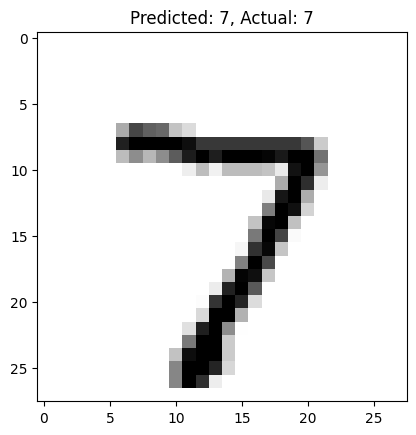

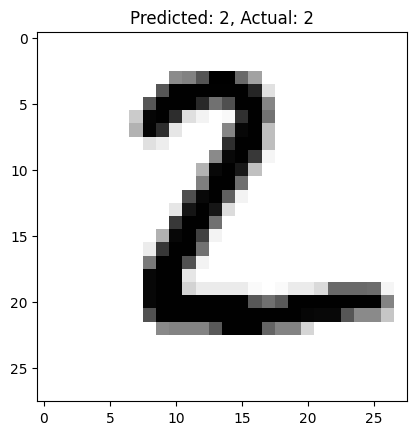

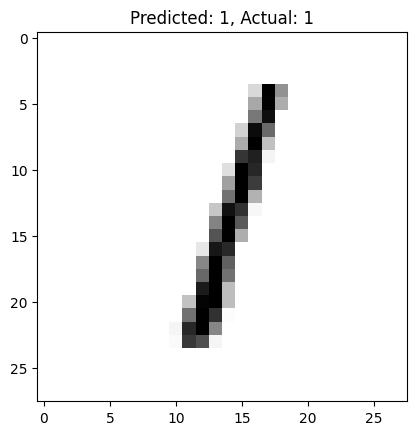

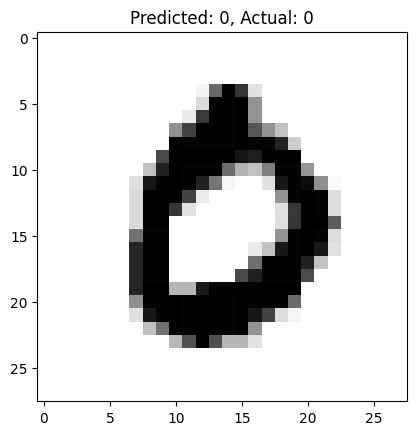

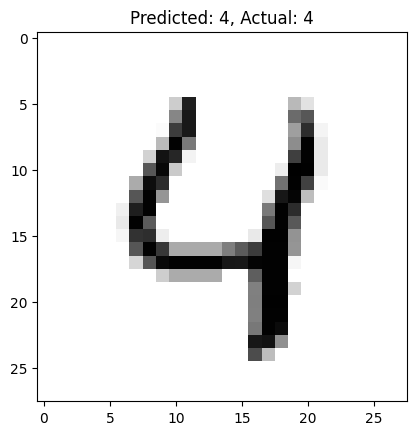

In [10]:
# Function to display an image and its prediction
def show_prediction(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
    plt.show()

# Display first 5 predictions
for i in range(5):
    show_prediction(i)

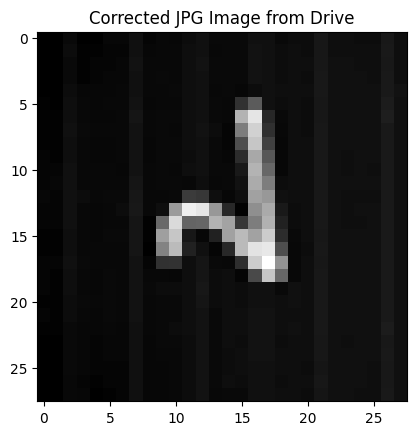

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the full path of the JPG image in Drive
image_path = "/content/drive/MyDrive/IMG_20250203_205850340_HDR.jpg"  # Change this path

# Load the image and convert it to grayscale
image = Image.open(image_path).convert("L")  # Convert to grayscale

# Rotate the image if it’s rotated (try a specific angle if needed)
image = image.rotate(0)  # You can adjust the angle if necessary (e.g., 90, 180)

# Resize to 28x28 pixels
image = image.resize((28, 28))

# Convert to NumPy array and normalize
image = np.array(image)
image = image / 255.0  # Normalize pixel values (0-1)
image = image.reshape(1, 28, 28, 1)  # Reshape for model input

# Display the image
plt.imshow(image.reshape(28,28), cmap=plt.cm.binary)
plt.title("Corrected JPG Image from Drive")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Digit: 2


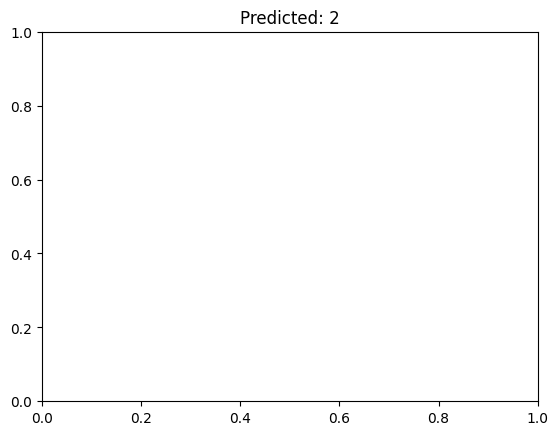

In [16]:
# Predict the digit
prediction = model.predict(image)
predicted_digit = np.argmax(prediction)

# Print and display the prediction
print(f"Predicted Digit: {predicted_digit}")

plt.title(f"Predicted: {predicted_digit}")
plt.show()